In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv


In [2]:
df = pd.read_csv("/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv")

In [3]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [4]:
df['cdi'].value_counts()

cdi
0    212
5    107
7     97
8     86
6     77
9     66
4     62
3     47
1     14
2     14
Name: count, dtype: int64

In [5]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [6]:
df.corr()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
magnitude,1.000000,0.209549,0.285552,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,-0.057083,-0.011926,-0.004726
cdi,0.209549,1.000000,0.317937,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.423158,0.007002,0.160266
mmi,0.285552,0.317937,1.000000,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.212855,-0.035238,-0.147363
sig,0.515871,0.479788,0.442423,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,0.124439,-0.029189,-0.015500
nst,0.113114,-0.175417,0.160417,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,-0.688602,-0.014021,-0.600231
dmin,-0.091403,0.006554,-0.299074,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.529449,0.037502,0.400752
gap,-0.110626,0.098143,-0.015723,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.194002,-0.024953,0.116360
depth,0.030644,-0.097891,-0.504439,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,0.178220,0.069213,0.056814
latitude,-0.008552,0.129003,0.144883,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,-0.089731,-0.057292,-0.113209
longitude,-0.013911,-0.149048,-0.005803,-0.190132,0.173665,-0.097875,-0.313623,-0.036986,0.026927,1.000000,-0.187947,0.028047,-0.136778


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df['tsunami'].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

In [8]:
df.groupby('Year')['tsunami'].value_counts()

Year  tsunami
2001  0          28
2002  0          25
2003  0          31
2004  0          32
2005  0          28
2006  0          26
2007  0          37
2008  0          25
2009  0          26
2010  0          41
2011  0          34
2012  0          31
2013  1          34
      0          19
2014  1          40
      0           8
2015  1          33
      0          20
2016  1          31
      0          12
2017  1          27
      0           9
2018  1          33
      0          10
2019  1          26
      0           7
2020  1          15
      0          12
2021  1          33
      0           9
2022  1          32
      0           8
Name: count, dtype: int64

In [9]:
df[df['Year']>2012]['tsunami'].value_counts()

tsunami
1    304
0    114
Name: count, dtype: int64

In [10]:
# !uv pip install -q scikit-learn==1.6.1 imblearn --system

In [11]:
'''Will use SMOTE if year is important enough'''

# from imblearn.over_sampling import SMOTE

# x=df.drop(["tsunami"],axis=1)
# y=df["tsunami"]
# smote=SMOTE(sampling_strategy='minority') 
# x,y=smote.fit_resample(x,y)
# y.value_counts()

'Will use SMOTE if year is important enough'

In [12]:
# Trying to see if year really has an impact on the possibility of a tsunami
from sklearn.model_selection import train_test_split

X=df.drop(["tsunami",'Year','Month'],axis=1)
y=df["tsunami"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude
602,6.6,8,8,831,782,0.000,16.7,12.00,37.5350,138.446
133,6.5,0,5,650,0,7.568,18.0,38.00,-58.6262,-25.304
239,7.0,5,6,897,0,0.698,21.0,19.00,-37.3586,179.146
55,6.9,5,4,738,0,1.173,36.0,20.74,55.2657,-157.680
613,7.1,8,7,1023,744,0.000,29.1,10.00,21.7990,120.547
...,...,...,...,...,...,...,...,...,...,...
71,7.0,7,7,1052,0,2.378,35.0,43.00,38.4752,141.607
106,7.0,5,6,770,0,4.501,25.0,143.00,45.6161,148.959
270,6.8,5,6,715,0,1.599,19.0,12.59,-8.8994,158.422
435,6.7,0,7,691,370,0.000,15.4,16.00,-1.6170,134.276


In [14]:
from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
scaler_target = StandardScaler()


X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.transform(X_test)

# y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1,1))
# y_test_scaled = scaler_target.fit_transform(y_test.values.reshape(-1,1))          #not reqd. since classification

In [15]:
# y_train_scaled
y_train

602    0
133    1
239    1
55     1
613    0
      ..
71     1
106    1
270    1
435    0
102    0
Name: tsunami, Length: 625, dtype: int64

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.8, random_state = 42)

ada.fit(X_train_scaled, y_train)

y_pred = ada.predict(X_test_scaled)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n--- TEST SET PERFORMANCE ---")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


--- TEST SET PERFORMANCE ---
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        91
           1       0.87      0.91      0.89        66

    accuracy                           0.90       157
   macro avg       0.90      0.91      0.90       157
weighted avg       0.91      0.90      0.90       157

Confusion matrix:
 [[82  9]
 [ 6 60]]


- The focus should be on precision because we need to be aware of even the slightest possibility of tsunami to take measures against it. A false positive here won't hurt.

### We will now check the lats and longs to understand seismic activity in the regions.

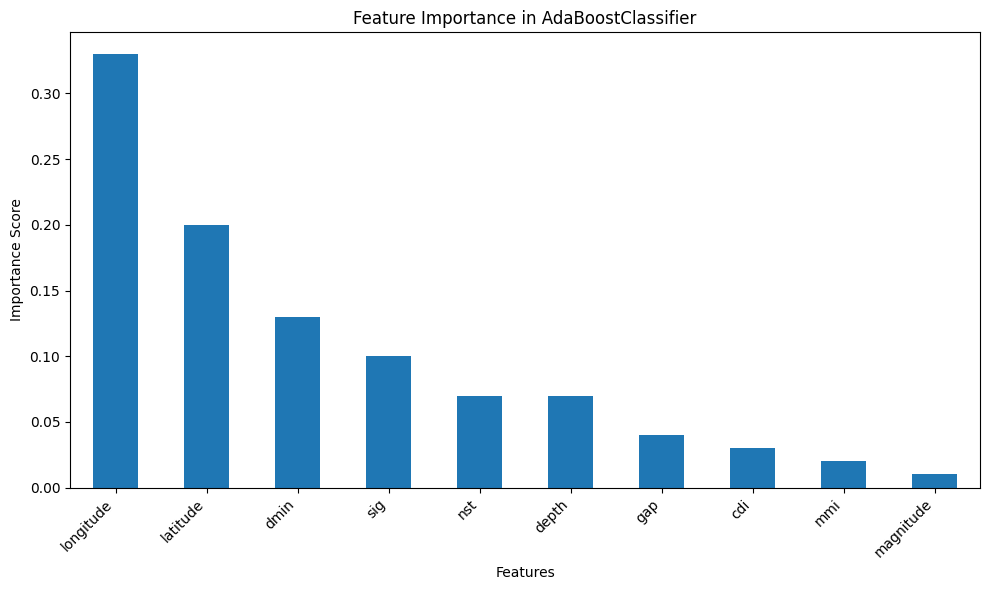

In [18]:
importances = ada.feature_importances_
feature_names = X_train.columns
# 4. Create a Pandas Series for easier handling and sorting
feature_importance_series = pd.Series(importances, index=feature_names)

# 5. Sort the importances for better visualization
sorted_importance = feature_importance_series.sort_values(ascending=False)

# 6. Plot the bar chart
plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='bar')
plt.title('Feature Importance in AdaBoostClassifier')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

- Quite surprising to see that magnitude doesn't play a strong part in determining the chances of a tsunami. A possible reason could be because earthquakes can happen anywhere irrespective of the location's proximity to a water body.

/tmp/ipykernel_13/2693573250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['tsunami']==0]['magnitude'], color='red')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/2693573250.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level fu

<Axes: xlabel='magnitude', ylabel='Density'>

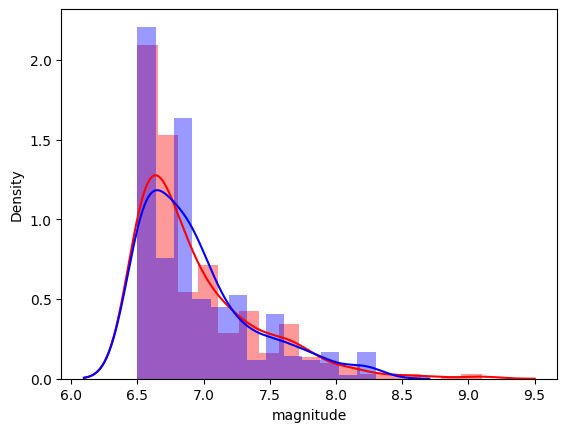

In [19]:
sns.distplot(df[df['tsunami']==0]['magnitude'], color='red')
sns.distplot(df[df['tsunami']==1]['magnitude'], color='blue')

In [20]:
coords = np.radians(df[["latitude","longitude"]].values)
coords

array([[-0.17097769,  2.78547567],
       [-0.08649677,  1.75820978],
       [-0.34995248, -3.11272491],
       ...,
       [-0.26054275,  2.91766691],
       [ 0.11573278,  2.21480537],
       [ 0.12039281,  2.20922031]])

In [21]:
from sklearn.cluster import DBSCAN

earth_km = 6371.0088
eps_km = 1000.0  # tune: 20-200 km depending on resolution you want
eps = eps_km / earth_km

db = DBSCAN(eps=eps, min_samples=10, metric="haversine").fit(coords)
df["spatial_cluster"] = db.labels_  # -1 are noise

In [22]:
df['spatial_cluster'].value_counts()

spatial_cluster
 0    541
 1    149
-1     49
 2     15
 4     15
 3     13
Name: count, dtype: int64

In [23]:
from sklearn.neighbors import NearestNeighbors

earth_km = 6371.0088
def neighbor_counts(eps_km, min_samples=10):
    eps_rad = eps_km / earth_km
    nn = NearestNeighbors(radius=eps_rad, metric="haversine", algorithm="ball_tree").fit(coords)
    # radius_neighbors returns indices for each sample
    neigh = nn.radius_neighbors(coords, return_distance=False)
    counts = np.array([len(v) for v in neigh])
    return counts

# choose a starting eps like 50 km and small min_samples
for eps_km in [5, 10, 20, 50, 100, 200]:
    cnts = neighbor_counts(eps_km)
    print(f"eps {eps_km} km -> median neighbor count: {np.median(cnts):.1f}, mean: {cnts.mean():.1f}, >= min_samples(=10): {(cnts >= 10).sum()}")


eps 5 km -> median neighbor count: 1.0, mean: 1.0, >= min_samples(=10): 0
eps 10 km -> median neighbor count: 1.0, mean: 1.1, >= min_samples(=10): 0
eps 20 km -> median neighbor count: 1.0, mean: 1.3, >= min_samples(=10): 0
eps 50 km -> median neighbor count: 2.0, mean: 2.2, >= min_samples(=10): 0
eps 100 km -> median neighbor count: 3.0, mean: 3.9, >= min_samples(=10): 67
eps 200 km -> median neighbor count: 6.0, mean: 7.6, >= min_samples(=10): 242


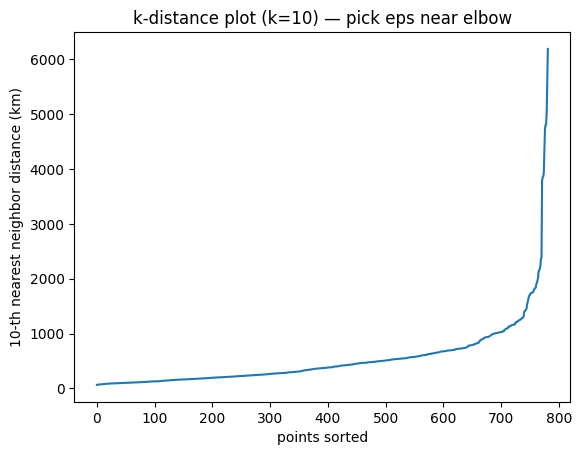

In [24]:
import matplotlib.pyplot as plt

k = 10  # set to desired min_samples
# NearestNeighbors for k+1 because nearest neighbor of a point is itself (dist=0)
nn = NearestNeighbors(n_neighbors=k+1, metric="haversine", algorithm="ball_tree").fit(coords)
distances, _ = nn.kneighbors(coords)
kth_dist_rad = distances[:, -1]          # k-th neighbor distance in radians
kth_dist_km = kth_dist_rad * earth_km    # convert to km

kth_sorted = np.sort(kth_dist_km)
plt.plot(kth_sorted)
plt.xlabel("points sorted")
plt.ylabel(f"{k}-th nearest neighbor distance (km)")
plt.title(f"k-distance plot (k={k}) — pick eps near elbow")
plt.show()

In [25]:
# Cluster-level aggregate
cluster_stats = df.groupby("spatial_cluster").agg(
    events=("tsunami","size"),
    tsunami_rate=("tsunami","mean"),
    avg_magnitude=("magnitude","mean"),
    avg_depth=("depth","mean")
).reset_index()
print(cluster_stats.sort_values("tsunami_rate", ascending=False).head(20))

   spatial_cluster  events  tsunami_rate  avg_magnitude  avg_depth
4                3      13      0.846154       7.069231  31.440000
2                1     149      0.422819       6.956376  76.070604
1                0     541      0.390018       6.950203  83.219800
5                4      15      0.333333       6.753333  14.437867
0               -1      49      0.285714       6.904082  42.296163
3                2      15      0.000000       6.660000  19.095333


In [26]:
near_thresh_km = 20
near_no_tsunami = df[(df["dmin"] <= near_thresh_km) & (df["tsunami"] == 0)]
print("events near epicenter but no tsunami:", len(near_no_tsunami))
near_no_tsunami_sample = near_no_tsunami#.sample(min(10, len(near_no_tsunami)))
print(near_no_tsunami_sample[["magnitude","depth","dmin","gap","nst","latitude","longitude"]])

events near epicenter but no tsunami: 478
     magnitude   depth   dmin   gap  nst  latitude  longitude
1          6.9   25.00  2.229  34.0   99   -4.9559   100.7380
14         6.6   12.00  8.454  34.0  141   29.7263   102.2790
17         6.5  622.73  1.999  31.0  236   -9.0618   -71.1647
26         6.7   28.00  2.188  43.0    0   -0.6831    98.6034
29         6.5  110.00  3.026  22.0    0   -4.4550   -76.9395
..         ...     ...    ...   ...  ...       ...        ...
777        7.7   60.00  0.000   0.0  427   13.0490   -88.6600
778        6.9   36.40  0.000   0.0    0   56.7744  -153.2810
779        7.1  103.00  0.000   0.0  372  -14.9280   167.1700
780        6.8   33.00  0.000   0.0   64    6.6310   126.8990
781        7.5   33.00  0.000   0.0  324    6.8980   126.5790

[478 rows x 7 columns]


In [27]:
df[df['nst']==427]

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,spatial_cluster
753,7.2,0,6,798,427,0.0,0.0,21.0,-17.600,167.856,2002,1,0,0
777,7.7,0,8,912,427,0.0,0.0,60.0,13.049,-88.660,2001,1,0,1


In [28]:
df[df['mmi']-df['cdi']>2][['cdi','mmi','tsunami']].value_counts()

cdi  mmi  tsunami
0    7    0          50
     6    0          48
     5    0          30
     4    1          15
     6    1          13
     4    0          11
     5    1          11
     8    0          11
4    7    0          11
3    6    0           9
0    3    1           7
1    4    1           5
0    7    1           5
     9    0           5
3    6    1           5
     7    0           4
0    3    0           4
3    7    1           4
2    5    1           3
1    5    1           3
     6    1           2
5    8    0           1
4    7    1           1
5    9    0           1
1    8    1           1
3    8    0           1
2    7    1           1
     6    1           1
     5    0           1
6    9    0           1
Name: count, dtype: int64